In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet

start_date = '2019-01-01'
end_date = '2022-01-01'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])

prices = np.sin(unix_dates)

data = pd.DataFrame({'ds': dates, 'y': prices})

In [19]:
data.head(80)

,ds,y
0,2019-01-01,-0.885371
1,2019-01-02,-0.920145
2,2019-01-03,-0.948861
3,2019-01-04,-0.971331
4,2019-01-05,-0.987407
...,...,...
75,2019-03-17,-0.777721
76,2019-03-18,-0.826123
77,2019-03-19,-0.869086
78,2019-03-20,-0.906327


In [29]:

model = Prophet(seasonality_mode='multiplicative', seasonality_prior_scale=15, changepoint_prior_scale=0.5,
                changepoint_range=0.9, yearly_seasonality=True, weekly_seasonality=True)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.1)
model.add_regressor('day_of_week')
model.add_country_holidays(country_name='US')
model.fit(data)

future_dates = model.make_future_dataframe(periods=30, freq='D')
future_dates['day_of_week'] = future_dates['ds'].dt.dayofweek
future_dates['holidays'] = model.predict_seasonal_components(future_dates)['holidays'].values

forecast = model.predict(future_dates)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

ValueError: Regressor 'day_of_week' missing from dataframe

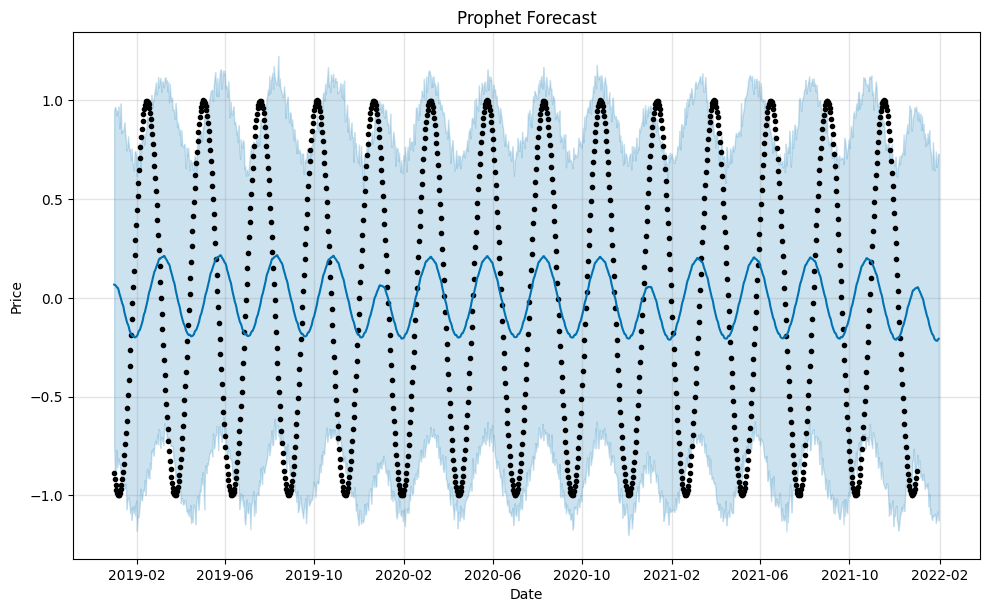

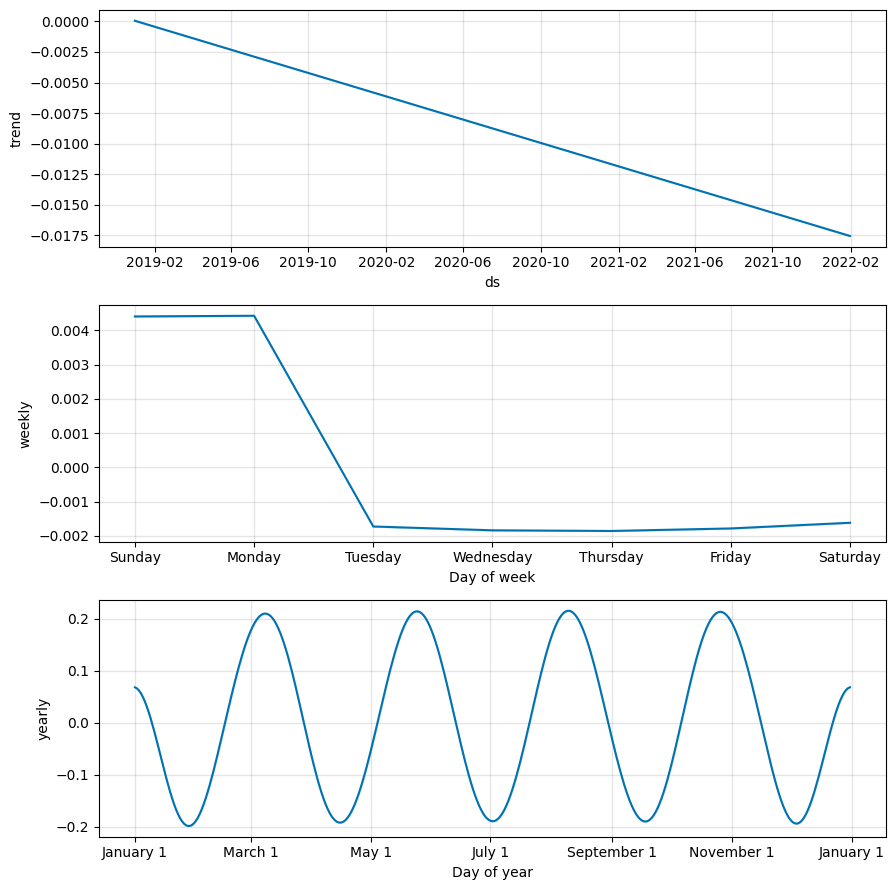

In [27]:
import matplotlib.pyplot as plt

model.plot(forecast, xlabel='Date', ylabel='Price')
plt.title('Prophet Forecast')
plt.show()

model.plot_components(forecast)
plt.show()

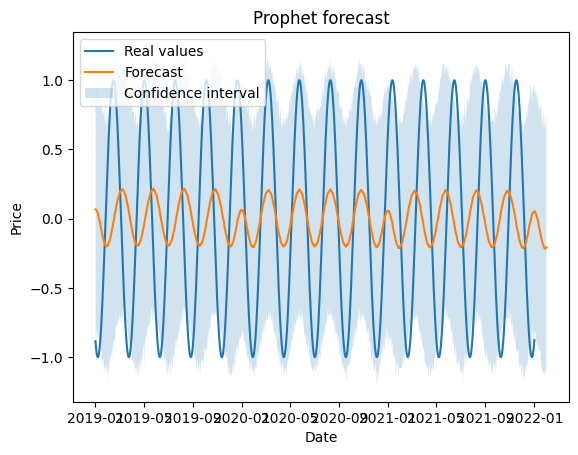

In [28]:
plt.plot(data['ds'], data['y'], label='Real values')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2, label='Confidence interval')

plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Prophet forecast')

plt.show()